In [4]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
data = pd.read_csv('train.csv')

# Extract the image file names and labels
image_files = data['Image'].values
labels = data['Class'].values

# Initialize empty lists for train images and train labels
train_images = []
train_labels = []

#image_directory = 'C:/Users/elena/OneDrive/Desktop/FMI AN II SEM II/ML/competitie/train_images'

image_directory = os.path.join(os.getcwd(), 'train_images')

# Loop through each image file and label
for image_file, label in zip(image_files, labels):

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))

    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    train_images.append(image)
    train_labels.append(label)

# Convert the lists to NumPy arrays
train_images = np.array(train_images)
#train_images = np.expand_dims(train_images, axis=3)
train_labels = np.array(train_labels)

print(train_images.shape)
train_images, train_labels = shuffle(train_images, train_labels) # amestecare


(12000, 32, 32, 3)


In [6]:

data = pd.read_csv('test.csv')

# Extract the image file names

image_files = data['Image'].values

# Initialize an empty list for test images
test_images = []

# Define the image directory
image_directory = os.path.join(os.getcwd(), 'test_images')

# Loop through each image file
for image_file in image_files:

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))
    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    test_images.append(image)

# Convert the list to a NumPy array
test_images = np.array(test_images)

# Print the shape of the test images array
print(test_images.shape)


(5000, 32, 32, 3)


In [7]:
data = pd.read_csv('val.csv')

# Extract the image file names and labels
v_image_files = data['Image'].values
v_labels = data['Class'].values

# Initialize empty lists for train images and train labels
val_images = []
val_labels = []

#image_directory = 'C:/Users/elena/OneDrive/Desktop/FMI AN II SEM II/ML/competitie/train_images'

image_directory = os.path.join(os.getcwd(), 'val_images')

# Loop through each image file and label
for image_file, label in zip(v_image_files, v_labels):

    image_path = os.path.join(image_directory, image_file)
    
    # Read and process the image
    image = Image.open(image_path)
    image = image.resize((32, 32))
    
    # Normalize the pixel values to the range [0, 1]
    image = np.array(image) / 255.0
    
    # Append the image and label to the lists
    val_images.append(image)
    val_labels.append(label)

# Convert the lists to NumPy arrays
val_images = np.array(val_images)
#train_images = np.expand_dims(train_images, axis=3)
val_labels = np.array(val_labels)

print(val_images.shape)
val_images, val_labels = shuffle(val_images, val_labels) # amestecare



(1000, 32, 32, 3)


In [8]:
def values_to_bins(X, num_bins):
    
    bins = np.linspace(start=0, stop=255, num = num_bins)
    X_to_bins = np.digitize(X, bins)
    
    return X_to_bins

In [9]:
def train_and_predict(train_images, train_labels, test_images, num_classes):
    # Flatten the images into 1-dimensional arrays
    train_images_flat = train_images.reshape(train_images.shape[0], -1)
    test_images_flat = test_images.reshape(test_images.shape[0], -1)
    
    # Initialize the Naive Bayes model
    naive_bayes_model = MultinomialNB()
    
    # Train the model
    naive_bayes_model.fit(train_images_flat, train_labels)
    
    # Predict the labels for test images
    predicted_labels = naive_bayes_model.predict(test_images_flat)

    train_score = naive_bayes_model.score(train_images_flat, train_labels)
    print(f"Train Accuracy: {train_score}")
    
    return predicted_labels

In [10]:
predicted_labels = train_and_predict(train_images, train_labels, test_images, num_classes=96)

data = pd.read_csv('test.csv')
imageF = data['Image']

submissions_df = pd.DataFrame({'Image': imageF, 'Class': predicted_labels})

submissions_df.to_csv('submissionnb.csv', header=True, index=False)

print("Submission file 'submissionnb.csv' created successfully.")


Train Accuracy: 0.24608333333333332
Submission file 'submissionnb.csv' created successfully.


Train Accuracy: 0.24608333333333332


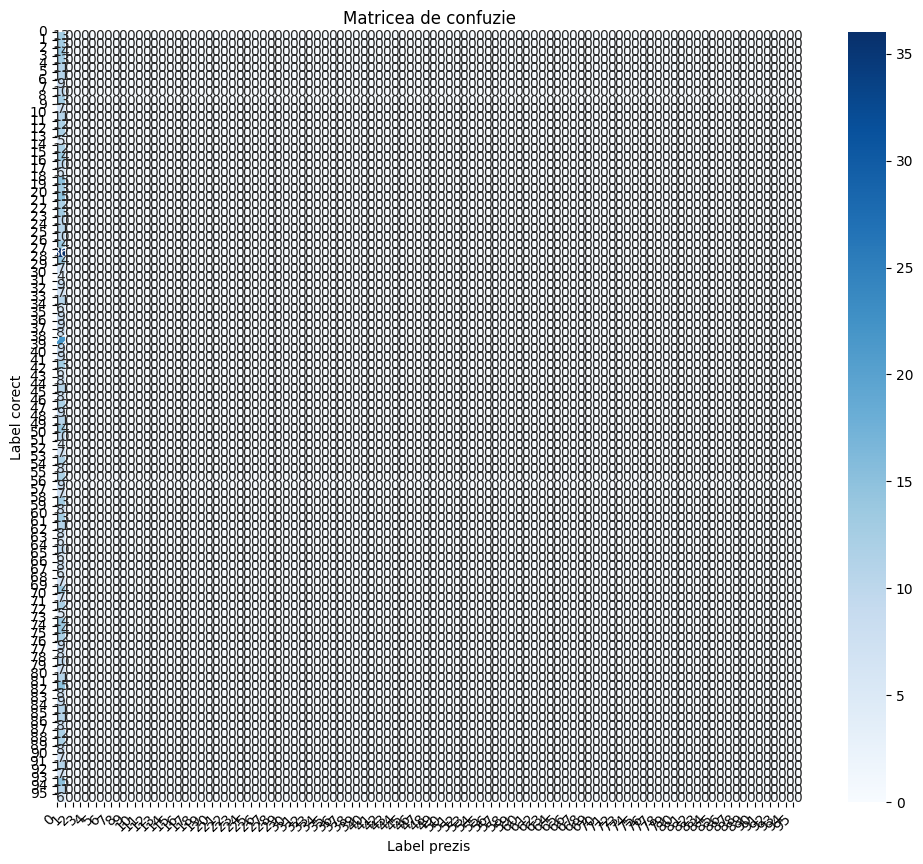

In [19]:
# Preziceri pentru imaginile de validare
predictions_val = train_and_predict(train_images, train_labels, val_images, num_classes=96)

predictions_val = np.reshape(predictions_val, (-1, 1))

predicted_labels_val = np.argmax(predictions_val, axis=1)

# Cream matricea de confuzie
con_mat = confusion_matrix(val_labels, predicted_labels_val)

plt.figure(figsize=(12, 10))

sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=True)

# Setam numele axelor si a tabelului
plt.xlabel('Label prezis')
plt.ylabel('Label corect')
plt.title('Matricea de confuzie')

classes = np.unique(val_labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes, rotation = 0)

plt.rcParams['font.size'] = 10

plt.show()